In [ ]:
# for loading/processing the images  
from tensorflow.keras.utils import load_img 
from tensorflow.keras.utils import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
path = r"C:\Users\saket\OneDrive\Desktop\cluster\garbage"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
garbage = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            garbage.append(file.name)

In [3]:
print(garbage[:10])

['battery1.jpg', 'battery10.jpg', 'battery100.jpg', 'battery101.jpg', 'battery102.jpg', 'battery103.jpg', 'battery104.jpg', 'battery105.jpg', 'battery106.jpg', 'battery107.jpg']


In [4]:
# load the image as a 224x224 array
img = load_img(garbage[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


In [5]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [6]:
x = preprocess_input(reshaped_img)

In [7]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [8]:
features = model.predict(reshaped_img)
print(features.shape)
(1,4096)

1/1 [==============================] - 0s 372ms/step
(1, 4096)


(1, 4096)

In [9]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [10]:
data = {}
p = r"C:\Users\saket\OneDrive\Desktop\cluster\flower.pkl"

# lop through each image in the dataset
for g in garbage:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(g,model)
        data[g] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

1/1 [==============================] - 0s 212ms/step


1/1 [==============================] - 1s 501ms/step


1/1 [==============================] - 0s 489ms/step


1/1 [==============================] - 1s 545ms/step


1/1 [==============================] - 1s 557ms/step


1/1 [==============================] - 1s 512ms/step


1/1 [==============================] - 0s 500ms/step


1/1 [==============================] - 0s 451ms/step


1/1 [==============================] - 0s 426ms/step


1/1 [==============================] - 0s 418ms/step


1/1 [==============================] - 0s 498ms/step


1/1 [==============================] - 1s 560ms/step


1/1 [==============================] - 0s 456ms/step


1/1 [==============================] - 0s 412ms/step


1/1 [==============================] - 0s 475ms/step


1/1 [==============================] - 1s 528ms/step


1/1 [==============================] - 0s 491ms/step


1/1 [==============================] - 1s 539ms/step


1/1 [==============================] - 0s 483ms/step


1/1 [==============================] - 1s 544ms/step


1/1 [==============================] - 1s 558ms/step


1/1 [==============================] - 0s 400ms/step


1/1 [==============================] - 1s 509ms/step


1/1 [==============================] - 0s 429ms/step


1/1 [==============================] - 0s 387ms/step


1/1 [==============================] - 0s 448ms/step


1/1 [==============================] - 0s 297ms/step


1/1 [==============================] - 0s 375ms/step


1/1 [==============================] - 1s 578ms/step


1/1 [==============================] - 0s 435ms/step


1/1 [==============================] - 0s 476ms/step


1/1 [==============================] - 0s 461ms/step


1/1 [==============================] - 0s 448ms/step


1/1 [==============================] - 0s 460ms/step


1/1 [==============================] - 0s 440ms/step


1/1 [==============================] - 0s 494ms/step


1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 0s 431ms/step


1/1 [==============================] - 0s 457ms/step


1/1 [==============================] - 0s 474ms/step


In [11]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(12108, 4096)

In [12]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [13]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")

Components before PCA: 4096
Components after PCA: 100


In [14]:
kmeans = KMeans(n_clusters=12,random_state=22)
kmeans.fit(x)

KMeans(n_clusters=12, random_state=22)

In [15]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1])

In [16]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [17]:
def view_cluster(cluster):
    plt.figure(figsize = (15,15));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 877 to 30


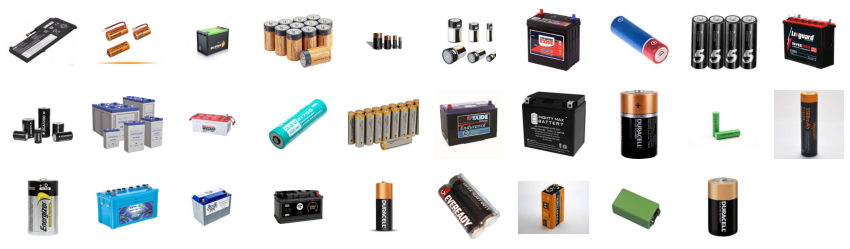

In [18]:
view_cluster(0)

Clipping cluster size from 1064 to 30


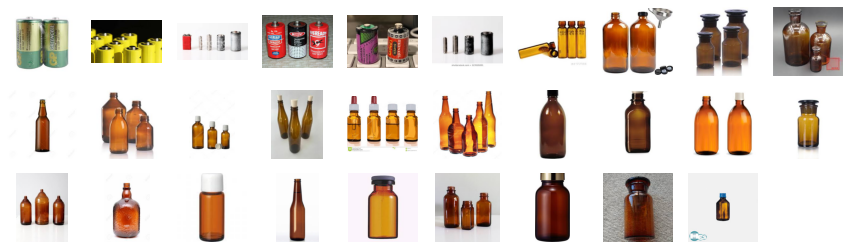

In [19]:
view_cluster(11)

In [20]:
groups[11]

['battery236.jpg',
 'battery47.jpg',
 'battery781.jpg',
 'battery826.jpg',
 'battery839.jpg',
 'battery890.jpg',
 'brown-glass1.jpg',
 'brown-glass10.jpg',
 'brown-glass100.jpg',
 'brown-glass102.jpg',
 'brown-glass103.jpg',
 'brown-glass104.jpg',
 'brown-glass105.jpg',
 'brown-glass106.jpg',
 'brown-glass107.jpg',
 'brown-glass108.jpg',
 'brown-glass109.jpg',
 'brown-glass11.jpg',
 'brown-glass110.jpg',
 'brown-glass111.jpg',
 'brown-glass113.jpg',
 'brown-glass116.jpg',
 'brown-glass117.jpg',
 'brown-glass118.jpg',
 'brown-glass119.jpg',
 'brown-glass12.jpg',
 'brown-glass121.jpg',
 'brown-glass123.jpg',
 'brown-glass124.jpg',
 'brown-glass125.jpg',
 'brown-glass126.jpg',
 'brown-glass127.jpg',
 'brown-glass129.jpg',
 'brown-glass13.jpg',
 'brown-glass130.jpg',
 'brown-glass131.jpg',
 'brown-glass135.jpg',
 'brown-glass14.jpg',
 'brown-glass144.jpg',
 'brown-glass146.jpg',
 'brown-glass15.jpg',
 'brown-glass152.jpg',
 'brown-glass156.jpg',
 'brown-glass16.jpg',
 'brown-glass17.jpg',


Clipping cluster size from 1011 to 30


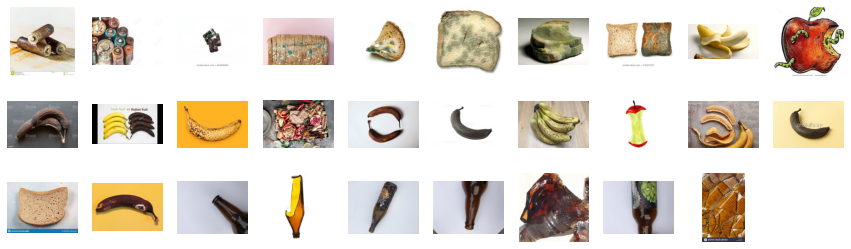

In [21]:
view_cluster(8)

Clipping cluster size from 2102 to 30


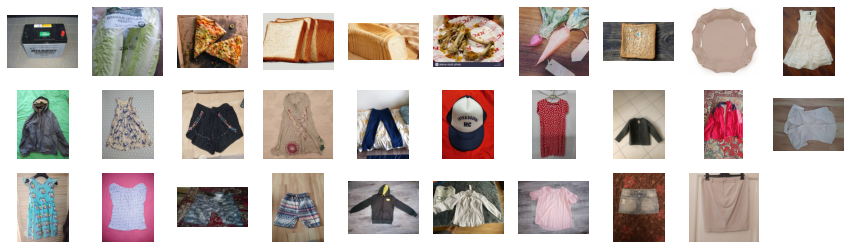

In [22]:
view_cluster(2)

Clipping cluster size from 528 to 30


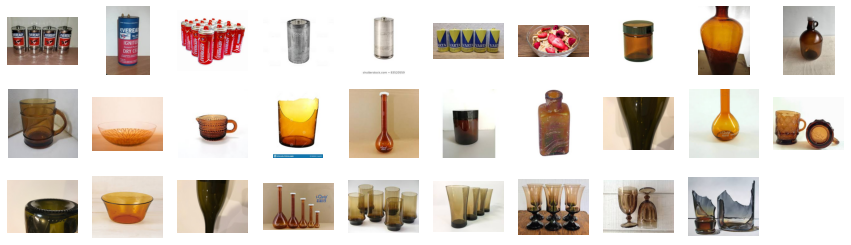

In [23]:
view_cluster(3)

Clipping cluster size from 507 to 30


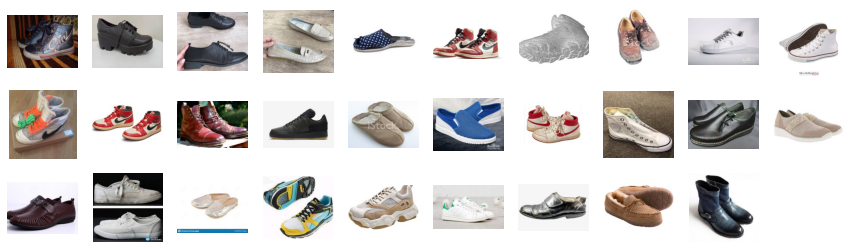

In [24]:
view_cluster(4)

Clipping cluster size from 996 to 30


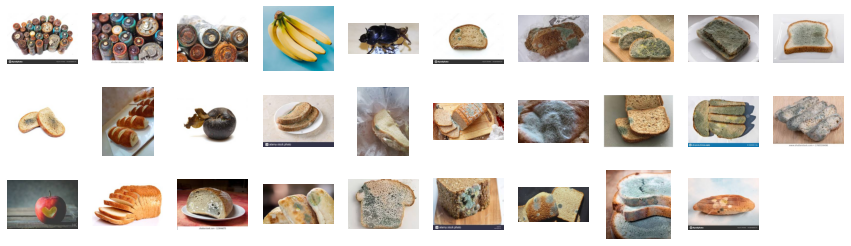

In [25]:
view_cluster(5)

Clipping cluster size from 1226 to 30


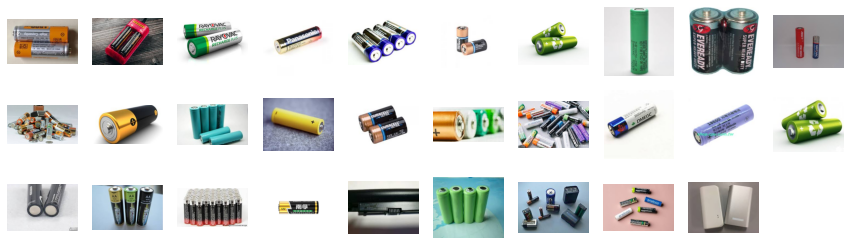

In [26]:
view_cluster(1)

In [28]:
import sklearn
sklearn.metrics.silhouette_score(x, kmeans.labels_, metric='euclidean', sample_size=None, random_state=None)

0.084151685

In [41]:
def size_cluster(cluster):
    files = groups[cluster]
    print(len(files))

In [91]:
def clust_per(cluster):
    b,bio,c,p,s,g=0,0,0,0,0,0
    for i in groups[cluster]:
        if i.startswith('battery'):
            b+=1
        elif i.startswith('biological'):
            bio+=1
        elif i.startswith('plastic'):
            p+=1
        elif i.startswith('clothes'):
            c+=1
        elif i.startswith('shoes'):
            s+=1
        elif i.startswith('brown'):
            g+=1
        elif i.startswith('green'):
            g+=1
        elif i.startswith('white'):
            g+=1
    print("battery:"+str(b))
    print("biological:"+str(bio))
    print("plastic:"+str(p))
    print("clothes:"+str(c))
    print("shoes:"+str(s))
    print("glass:"+str(g))
    maxi= max(b,bio,c,p,s,g)
    sumi= b+bio+c+p+s+g
    per=(maxi/sumi)*100
    print(maxi)
    print(per)

In [92]:
clust_per(0)

battery:853
biological:0
plastic:12
clothes:1
shoes:0
glass:11
853
97.26339794754846


In [93]:
clust_per(1)

battery:72
biological:7
plastic:549
clothes:4
shoes:18
glass:576
576
46.98205546492659


In [94]:
clust_per(2)

battery:1
biological:7
plastic:51
clothes:2009
shoes:19
glass:15
2009
95.5756422454805


In [95]:
clust_per(3)

battery:6
biological:1
plastic:45
clothes:0
shoes:7
glass:469
469
88.82575757575758


In [96]:
clust_per(4)

battery:0
biological:0
plastic:0
clothes:4
shoes:503
glass:0
503
99.21104536489152


In [97]:
clust_per(5)

battery:3
biological:951
plastic:3
clothes:6
shoes:4
glass:29
951
95.48192771084338


In [98]:
clust_per(6)

battery:1
biological:0
plastic:0
clothes:20
shoes:537
glass:1
537
96.06440071556351


In [99]:
clust_per(7)

battery:0
biological:0
plastic:11
clothes:1233
shoes:0
glass:0
1233
99.11575562700965


In [100]:
clust_per(8)

battery:3
biological:19
plastic:7
clothes:56
shoes:889
glass:37
889
87.93273986152325


In [101]:
clust_per(9)

battery:0
biological:0
plastic:2
clothes:822
shoes:0
glass:0
822
99.75728155339806


In [102]:
clust_per(10)

battery:0
biological:0
plastic:0
clothes:1170
shoes:0
glass:0
1170
100.0


In [103]:
clust_per(11)

battery:6
biological:0
plastic:185
clothes:0
shoes:0
glass:873
873
82.04887218045113
